# Génération de Variables Gaussiennes

Dans ce notebook, nous allons explorer la génération de variables gaussiennes et de vecteurs gaussiens en partant des concepts les plus simples et en progressant vers des exemples plus avancés.



## Partie 1 : Variable Gaussienne Centrée





### Concept mathématique

Une variable gaussienne centrée est une variable aléatoire qui suit une distribution gaussienne (normale) avec une moyenne µ de 0 et une variance σ^2 de 1. Mathématiquement, elle est définie par la densité de probabilité suivante :

$$
f(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}
$$



### Génération de Variables Gaussiennes Centrées

Pour générer des échantillons de cette variable, nous utiliserons le théorème de Box-Muller.



### Théorème de Box-Muller

Le théorème de Box-Muller est une méthode permettant de générer des variables aléatoires gaussiennes (normales) à partir de variables aléatoires uniformes. Cette méthode est couramment utilisée en statistiques et en simulation.



### Formulation mathématique

Le théorème de Box-Muller repose sur les équations suivantes :

Pour générer deux variables aléatoires gaussiennes indépendantes Z1 et Z2 à partir de deux variables aléatoires uniformes indépendantes U1 et U2 dans l'intervalle [0, 1], on peut utiliser les équations suivantes :

$$
Z1 = \sqrt{-2 \ln(U1)} \cdot \cos(2\pi U2)
$$

$$
Z2 = \sqrt{-2 \ln(U1)} \cdot \sin(2\pi U2)
$$

Ici, U1 et U2 sont des variables uniformes aléatoires dans l'intervalle [0, 1]. Z1 et Z2 sont des échantillons de variables aléatoires gaussiennes indépendantes avec une moyenne de 0 et une variance de 1.



### Implémentation en Python

Commençons par générer des échantillons d'une variable gaussienne centrée en utilisant le théorème de Box-Muller.




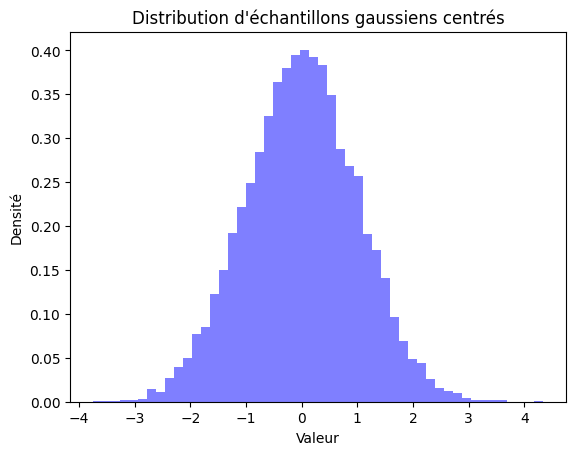

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction pour générer une variable gaussienne centrée
def generate_standard_gaussian_samples(n):
    samples = np.zeros(n)

    for i in range(n):
        u1, u2 = np.random.rand(), np.random.rand()
        z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
        samples[i] = z1

    return samples

# Générer 10000 échantillons gaussiens centrés
n_samples = 10000
standard_gaussian_samples = generate_standard_gaussian_samples(n_samples)

# Afficher un histogramme des échantillons
plt.hist(standard_gaussian_samples, bins=50, density=True, color='b', alpha=0.5)
plt.title('Distribution d\'échantillons gaussiens centrés')
plt.xlabel('Valeur')
plt.ylabel('Densité')
plt.show()

Nous avons généré des échantillons d'une variable gaussienne centrée en utilisant le théorème de Box-Muller.

## Partie 2 : Variable Gaussienne Multidimensionnelle (Vecteur Gaussien)




### Concept mathématique

Un vecteur gaussien multidimensionnel est un ensemble de variables aléatoires gaussiennes dont les composantes sont corrélées. Il est défini par une moyenne vectorielle µ et une matrice de covariance Σ. La densité de probabilité est définie comme suit :

$$
f(\mathbf{x}) = \frac{1}{\sqrt{(2\pi)^n|\Sigma|}}e^{-\frac{1}{2}(\mathbf{x}-\mu)^T \Sigma^{-1} (\mathbf{x}-\mu)}
$$



### Génération de Vecteurs Gaussiens Multidimensionnels

Pour générer un vecteur gaussien, nous utiliserons la décomposition de Cholesky pour la matrice de covariance.



### Décomposition de Cholesky

La décomposition de Cholesky est une méthode qui permet de décomposer une matrice symétrique définie positive en un produit de deux matrices, dont l'une est la transposée de l'autre. Dans le contexte de la génération de vecteurs gaussiens, nous l'utilisons pour obtenir une matrice de décomposition qui nous permet de transformer des échantillons de variables gaussiennes centrées en échantillons de vecteurs gaussiens avec une moyenne et une matrice de covariance spécifiques.



### Formulation mathématique

La décomposition de Cholesky pour une matrice de covariance Σ consiste à exprimer Σ comme suit :

$$
Σ = LL^T
$$

où L est une matrice triangulaire inférieure. La matrice L est la matrice de décomposition que nous utiliserons pour générer des échantillons de vecteurs gaussiens.



### Implémentation en Python

Générons des échantillons d'un vecteur gaussien multidimensionnel (2D) centré à zéro avec une matrice de covariance spécifiée.



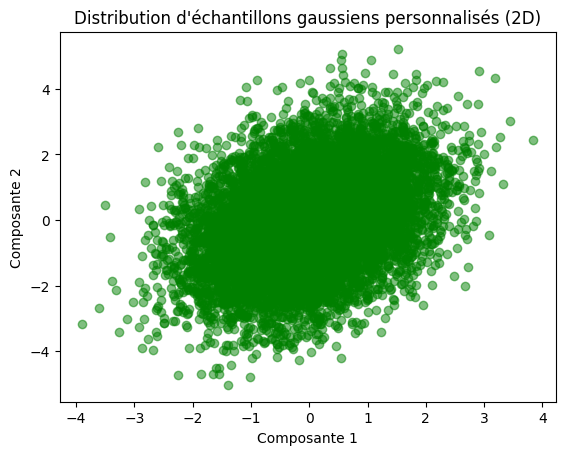

In [5]:
# Définir la moyenne et la matrice de covariance personnalisées
mean = np.array([0.0, 0.0])
cov_matrix = np.array([[1.0, 0.5], [0.5, 2.0]])

# Décomposition de Cholesky de la matrice de covariance
chol_matrix = np.linalg.cholesky(cov_matrix)

# Générer des échantillons gaussiens centrés autour de 'mean' avec la matrice de covariance 'cov_matrix'
n_samples = 10000
standard_samples = np.random.randn(n_samples, 2)
custom_samples = mean + np.dot(standard_samples, chol_matrix.T)

# Afficher un nuage de points des échantillons
plt.scatter(custom_samples[:, 0], custom_samples[:, 1], color='g', alpha=0.5)
plt.title('Distribution d\'échantillons gaussiens personnalisés (2D)')
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
plt.show()

Dans la partie suivnte, nous générons des échantillons d'un vecteur gaussien 2D centré autour de `mean` avec une matrice de covariance `cov_matrix` personnalisée en utilisant la décomposition de Cholesky.


## Partie 3 : Variable Gaussienne Non Centrée



### Concept mathématique

Une variable gaussienne non centrée est une variable aléatoire qui suit une distribution gaussienne avec une moyenne µ et une variance-covariance Σ spécifiques. Pour générer une telle variable, nous pouvons utiliser la méthode du vecteur gaussien centré et l'ajuster pour refléter la moyenne et la matrice de covariance souhaitées.



### Génération de Variables Gaussiennes Non Centrées

Pour générer une variable gaussienne non centrée, nous ajoutons simplement la moyenne personnalisée aux échantillons gaussiens centrés que nous avons générés précédemment.



### Implémentation en Python

Générons des échantillons d'une variable gaussienne non centrée avec une moyenne et une matrice de covariance personnalisées.

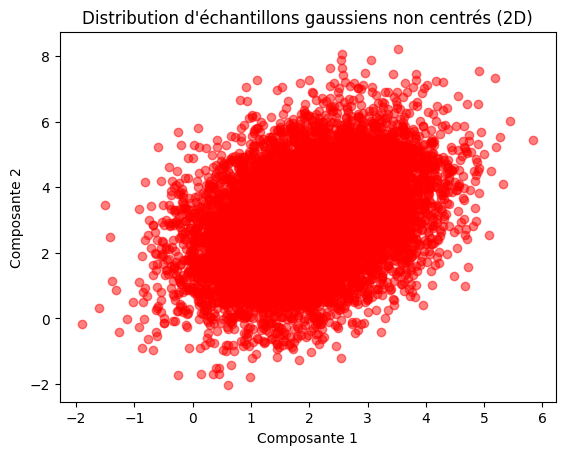

In [6]:
# Moyenne personnalisée
custom_mean = np.array([2.0, 3.0])

# Générer des échantillons gaussiens non centrés autour de 'custom_mean' avec la matrice de covariance 'cov_matrix'
non_centered_samples = custom_mean + np.dot(standard_samples, chol_matrix.T)

# Afficher un nuage de points des échantillons
plt.scatter(non_centered_samples[:, 0], non_centered_samples[:, 1], color='r', alpha=0.5)
plt.title('Distribution d\'échantillons gaussiens non centrés (2D)')
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
plt.show()

Dans cette partie, nous générons des échantillons d'une variable gaussienne non centrée en ajoutant la moyenne `custom_mean` aux échantillons gaussiens centrés que nous avons générés précédemment.